Make sure you installed ***sklearn***, ***matplotlib*** and ***numpy*** if you use your local machine

In [ ]:
!pip install scikit-learn-extra
!pip install scipy

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn_extra
import scipy
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.cluster
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram


In [ ]:
categories = ['soc.religion.christian', 'sci.space', 'rec.sport.hockey', 'comp.sys.mac.hardware', 'sci.med']
# categories = ['alt.atheism', 'soc.religion.christian']
# categories = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
# categories = ['rec.sport.baseball', 'rec.sport.hockey']
# 'alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware',
# 'comp.sys.mac.hardware','comp.windows.x', 'misc.forsale', 'rec.autos',  
# 'rec.motorcycles',  'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
# 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns',
# 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc'
train = sklearn.datasets.fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'),)
test = sklearn.datasets.fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'),)
print('train data size:', len(train.data))
print('test data size:', len(test.data))

train data size: 2964
test data size: 1972


# Nearest Neighbors

In [ ]:
idx = 200
inst = train.data[idx]
print(train.data[idx])

I believe it goes or will go:
680060
powerPC
Pentium
680040
486
680030
386
680020
286=680000

In a resent article in one of the macMags I think a 50mHz 030 accelerator was
 slightly slower than a 25mHz 040 accel. But, this is using a system designed
 for the 030. So, It stands to reason that a system designed for an 040 ie
 quadra) would do better. So overall I'd figure 040 = 030 * 2.5 or so.
    Along the same lines the new POwerPC stuff is supposed to run the system
 at the level of a fast quadra, but system 8 or whatever will allow 3 times the
 speed of a 040 in the powerPC based systems. and wait for the 680060. I think
 it laps the pentium.

pro-life pro-women




In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)

idx = 200
inst = train.data[idx]
train.target_names[train.target[idx]]
pd.DataFrame.from_dict({'category':[train.target_names[train.target[idx]]], 'email':[inst]})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,category,email
0,comp.sys.mac.hardware,"I believe it goes or will go:\n680060\npowerPC\nPentium\n680040\n486\n680030\n386\n680020\n286=680000\n\nIn a resent article in one of the macMags I think a 50mHz 030 accelerator was\n slightly slower than a 25mHz 040 accel. But, this is using a system designed\n for the 030. So, It stands to reason that a system designed for an 040 ie\n quadra) would do better. So overall I'd figure 040 = 030 * 2.5 or so.\n Along the same lines the new POwerPC stuff is supposed to run the system\n at the level of a fast quadra, but system 8 or whatever will allow 3 times the\n speed of a 040 in the powerPC based systems. and wait for the 680060. I think\n it laps the pentium.\n\npro-life pro-women\n\n"


,category,email
0,comp.sys.mac.hardware,"dhk@ubbpc.uucp (Dave Kitabjian) writes ...\n\n040 486 030 386 020 286\n\n\n060 fastest, then Pentium, with the first versions of the PowerPC\nsomewhere in the vicinity.\n\n\nNo. Computer speed is only partly dependent of processor/clock speed.\nMemory system speed play a large role as does video system speed and\nI/O speed. As processor clock rates go up, the speed of the memory\nsystem becomes the greatest factor in the overall system speed. If\nyou have a 50MHz processor, it can be reading another word from memory\nevery 20ns. Sure, you can put all 20ns memory in your computer, but\nit will cost 10 times as much as the slower 80ns SIMMs.\n\nAnd roughly, the 68040 is twice as fast at a given clock\nspeed as is the 68030.\n"
1,comp.sys.mac.hardware,"I'm thinking about upgrading my 030 50MHz to the 040 33version. Has anyone\nhad any experience with the accelerator, and if so - what do you think?\nAny problems, what are the speedometer results?, is it much faster than\nthe 50MHz? Basically, I'd appreciate hearing all about this product. Please\nrespond via email, and I'll summarize if there's a big response. thanks\nin advance, Andrew\n"
2,comp.sys.mac.hardware,"\nRadius speculated, publicly, that they could provide a PowerPC-based\nRocket for existing Macs. It would have the plus of RocketShare and\nthe minus of NuBus accelerators - no true boot off the accelerator,\nNuBus bottleneck to video and other I/O.\n\nApple, it seems, will not compete with third parties here -- except\nperhaps for not-yet-available Macs like Cyclone, where a PowerPC\nslot might be advertised. Look for Daystar and such to make PowerPC\naccelerators.\n\nOne potential problem with any accelerator, though, is that it will\nneed a ROM companion and Apple has licensed only Radius, with\nRocketshare, to use any of its proprietary code.\n\nApple is, between the lines, trying to let us know that PowerPC Macs\nwill have simplified logic boards due to the magical nature of RISC\nand that these boards should be much cheaper to build than those in\nexisting 68040 Macs. Perhaps, then, we'll see groundbreaking\nprices in Mac-logic board upgrades, much the same way we've seen\nmuch cheaper high-performance CPUs this year.\n\nFirst generation PowerPCs, 98601s, will also hopefully have socketed\nCPUs so that they'll be chip upgradeable to 98604s a year later.\nThis should be possible in much the same way that 486s can be pulled\nfor clock doublers. If there is too much technical baggage (which\nI doubt since the external busses are the same size/width) to do\nthis, perhaps we can have CPU daughterboard, a la Powerbook, as\nstandard to facilitate better CPU upgrades. This is an area where\nApple has fallen far behing the Intel-based world. Perhaps catchup\nis in order.\n\nBy the way, last week's PC week had an excellent story on PowerPC,\nPentium, MIPS R4000, DEC Alpha (the big four on the microprocessor\nfront for the forseeable future). Worth reading for technojunkies.\nAlso, the latest PC has a cover story on Pentium. Read it, and all\nthe other stories about how Intel is unstoppable and preeminent\nright now.\n\nOnce anyone is this secure, they are due to fall. Intel's market\nposition will never again be as dominant as it is today (especially\nif AMD gets the go ahead to sell its 486s this week as it appears it\nmight). The competition from all fronts is gearing up for an awesome\nbattle. Apple users should be excited that PowerPC, while not\nguaranteed dominance, is a guaranteed winner, even if its one of\nseveral."
3,comp.sys.mac.hardware,"\n\n\tI think this kind of comparison is pretty useless in general. The\nprocessor is only good when a good computer is designed around it adn the\ncomputer is used in its designed purpose. Comparing processor speed is\npretty dumb because all you have to do is just increase the clock speed\nto increase speed among other things.\n\n\tI mean how can you say a 040 is faster than a 486 witho

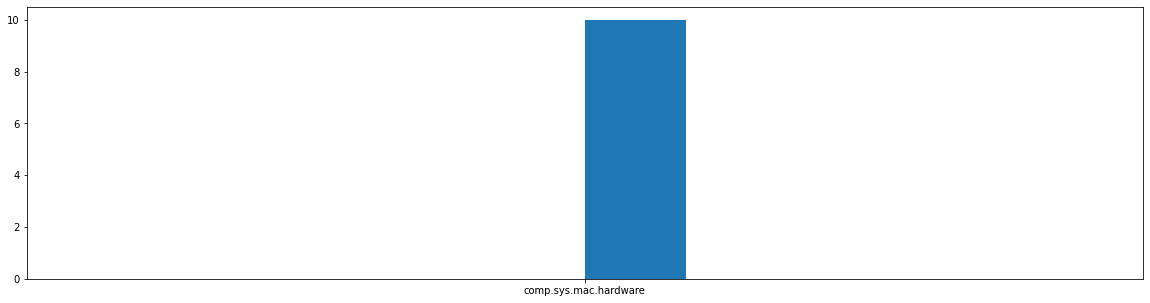

In [ ]:
num_neighs = 10

metric = 'cosine' # or 'cosine', 'l1', 'l2'
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True) #create TfIDF vectorizer
train.vecs = features.fit_transform(train.data) #Convert all train data to TfIDF vector representation
nbrs = NearestNeighbors(n_neighbors=num_neighs+1, algorithm='brute', metric=metric).fit(train.vecs)
distances, indices = nbrs.kneighbors(train.vecs[idx])
# for nidx in indices[indices!=idx]:
#   print('-----')
#   print(train.target_names[train.target[nidx]])
#   print(train.data[nidx])
plt.rcParams["figure.figsize"] = (20,5)
plt.hist([train.target_names[nidx] for nidx in train.target[indices[indices!=idx]]])
pd.DataFrame.from_dict({'category':[train.target_names[nidx] for nidx in train.target[indices[indices!=idx]]], 'email':[train.data[nidx] for nidx in indices[indices!=idx]]})

In [ ]:
print(distances)
print(indices)

[[0.         0.88650979 0.90527354 0.91077546 0.91596077 0.91635415
  0.92360247 0.92568617 0.92857766 0.93028488 0.93632466]]
[[ 200 2771 1460 1635 1608  398  914 2782  775  349  336]]


# KMeans

In [ ]:
#random.seed(a = 200)
features = TfidfVectorizer(ngram_range=(1,1), stop_words= 'english', lowercase=True, max_features=2000, max_df=0.9)
train.vecs = features.fit_transform(train.data)

(array([536., 460.,   0., 986.,   0., 184.,  71.,   0., 347., 380.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <a list of 10 Patch objects>)

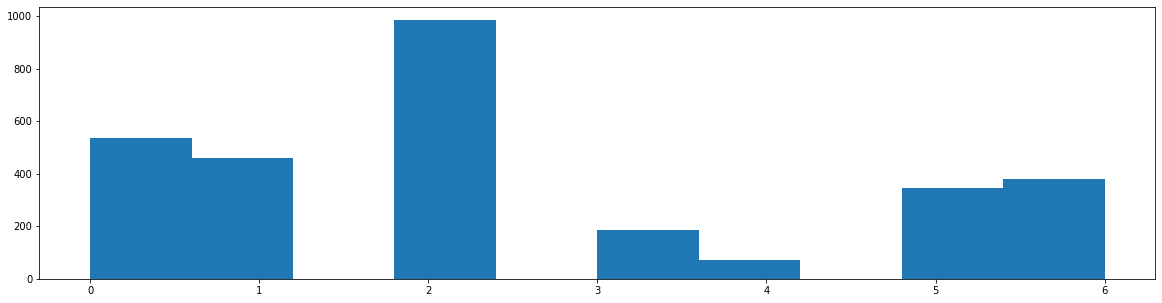

In [ ]:
clusterer = KMeans(n_clusters=7, init='k-means++', max_iter=500, n_init=5, algorithm="full")
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

In [ ]:
clusts[1:20]

array([2, 2, 2, 1, 2, 2, 4, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
def purity_score(c, y):
  '''From: http://www.caner.io/purity-in-python.html'''
  A = np.c_[(c,y)]
  n_accurate = 0.
  for j in np.unique(A[:,0]):
    z = A[A[:,0] == j, 1]
    x = np.argmax(np.bincount(z))
    n_accurate += len(z[z == x])
  return n_accurate / A.shape[0]
  
def cluster_purity(c, y):
  numy = len(set(y))
  cvals = list(set(c)) #[str(ce) for ce in list(set(c))]
  numc = len(cvals)
  ind = [str(cval) for cval in cvals] #np.arange(numc)
  bottom = np.zeros(numc)
  for yidx in range(numy):
    counts = np.zeros(numc)
    for cidx in range(numc):
      num = len(list(filter(lambda p: p[0]==cvals[cidx] and p[1]==yidx, zip(c,y))))
      counts[cidx] = num
    plt.bar(ind, counts,label=train.target_names[yidx],bottom=bottom)
    bottom = bottom + counts
  plt.legend()

Purity: 0.659919028340081


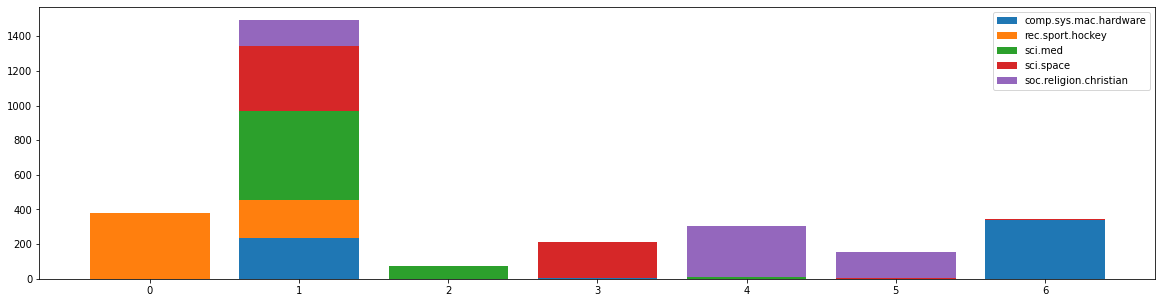

In [ ]:
cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

k= 1 done, purity: 0.20242914979757085
k= 2 done, purity: 0.31950067476383265
k= 3 done, purity: 0.3825910931174089
k= 4 done, purity: 0.4915654520917679
k= 5 done, purity: 0.645748987854251
k= 6 done, purity: 0.6632928475033738
k= 7 done, purity: 0.6818488529014844
k= 8 done, purity: 0.699055330634278
k= 9 done, purity: 0.6558704453441295
k= 10 done, purity: 0.6939946018893387
k= 11 done, purity: 0.3967611336032389
k= 12 done, purity: 0.4824561403508772
k= 13 done, purity: 0.701417004048583
k= 14 done, purity: 0.6713900134952766
k= 15 done, purity: 0.6865721997300944
k= 16 done, purity: 0.6798245614035088
k= 17 done, purity: 0.7044534412955465
k= 18 done, purity: 0.703778677462888
k= 19 done, purity: 0.6815114709851552


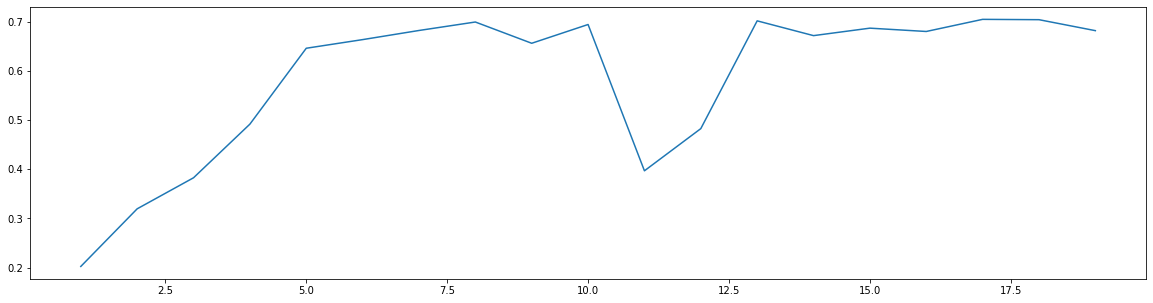

In [ ]:
import nltk

purity = []
wcss=[]

krange = range(1,20)
for k in krange:
  tclusterer = KMeans(n_clusters=k, init='k-means++', max_iter=500, n_init=5, algorithm="full")
  clusts = tclusterer.fit_predict(train.vecs)
  purity.append(purity_score(clusts, train.target))
  wcss.append(tclusterer.inertia_)
  print('k=',k,'done, purity:', purity[k-1])

#plt.plot(krange, wcss)
plt.plot(krange, purity)

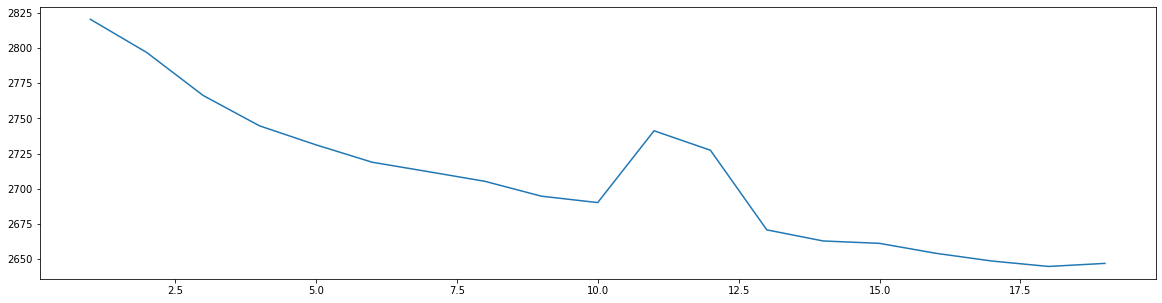

In [ ]:
plt.plot(krange, wcss)

(array([  44.,  352.,  392.,    0.,  319.,  245.,    0., 1425.,   71.,
         116.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

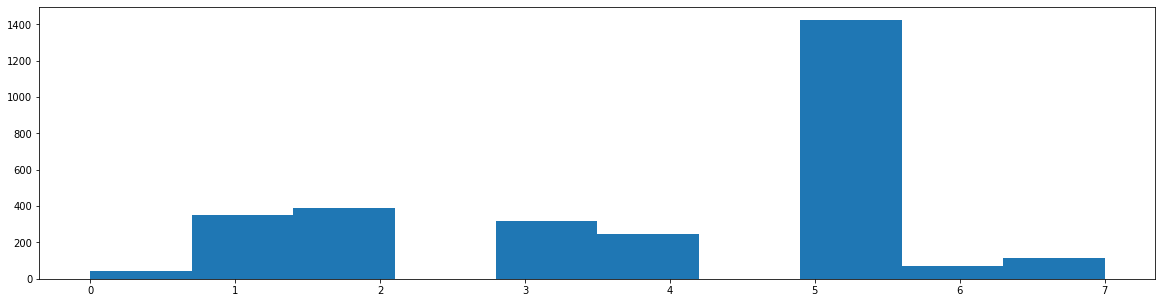

In [ ]:
#random.seed(a = 200)
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True, max_features=2000, max_df=0.9)
train.vecs = features.fit_transform(train.data)

clusterer = KMeans(n_clusters=8, init='k-means++', max_iter=100, n_init=10)
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

Purity: 0.6673414304993253


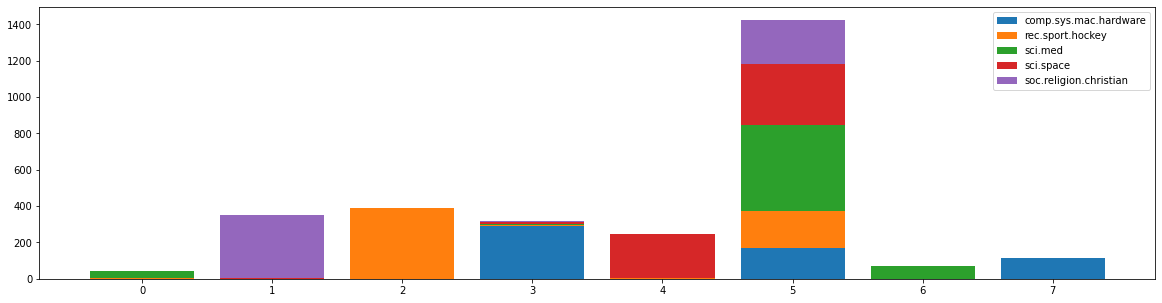

In [ ]:
cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

In [ ]:
centroids = clusterer.cluster_centers_

In [ ]:
train.vecs[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(centroids)

[[0.00000000e+00 2.99737732e-03 0.00000000e+00 ... 0.00000000e+00
  2.48920797e-03 0.00000000e+00]
 [6.83232291e-04 1.94160768e-04 0.00000000e+00 ... 2.49895761e-04
  3.12655039e-03 0.00000000e+00]
 [5.13927883e-03 4.04619346e-03 5.04848693e-05 ... 6.63036399e-03
  3.76118499e-03 5.09422917e-03]
 ...
 [1.97855290e-03 1.70579788e-03 1.47743491e-04 ... 2.06957877e-03
  1.76152514e-03 1.08258717e-03]
 [0.00000000e+00 4.13563677e-03 0.00000000e+00 ... 0.00000000e+00
  1.95135648e-03 0.00000000e+00]
 [5.98658079e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.50927343e-03]]


In [ ]:
#pd.DataFrame.from_dict({'category':[train.target_names[train.target[2538]]], 'email':[train.data[2538]]})

In [ ]:
nbrs = NearestNeighbors(n_neighbors=num_neighs+1, algorithm='brute', metric=metric).fit(train.vecs)
distance, indices = nbrs.kneighbors(centroids)

In [ ]:
indices

array([[2698, 2022, 1700, 1247, 1753, 1556, 1884, 1302, 1091,   88, 1851],
       [1126, 2746, 1402, 1976, 2568,  719, 1678, 1357, 2250,  304,  998],
       [1150,  876, 2608, 1448, 1084, 2393,  644, 2315,  892, 2457,  982],
       [2805, 2000,  673, 1999,  822, 1392,  482, 1908,   98,  256, 2243],
       [ 335, 2564,  582,  365, 1153,  628, 1380,  356, 2277, 2467, 2872],
       [2086,  154,  427, 1685, 1242, 1028, 1071,  934,  917, 2559, 2673],
       [1381,   20,  671,  827, 2910, 1107, 1377, 1329, 1548,  720,   14],
       [1673, 1392, 2213,  569, 2651,  274,  271, 2270, 1076, 2014,  889]])

In [ ]:
print('Document closest to Cluster 1:\n', train.data[1126])

Document closest to Cluster 1:
 I have come across what I consider to be an excellent tract. It is a
bit lengthy for a posting, but I thought I'd share it with all of you
anyway. Feel free to pass it along to anyone whom you feel might
benefit from what it says. May God richly bless those who read it.
 
 
                   D O E S  G O D  L O V E  Y O U ?
 
 
Q. What  kind  of  question  is that?   Anyone who can read sees signs,
   tracts, books, and bumper stickers that say, "God Loves You."  Isn't
   that true?
 
A. It  is  true that God offers His love to the whole world, as we read
   in one of the most quoted verses in the Bible:
 
      For  God  so  loved  the world, that he gave his only begotten
      Son, that whosoever believeth in him should  not  perish,  but
      have everlasting life.                               John 3:16
 
 
      The way of the wicked is an abomination unto the LORD:  but he
      loveth him that followeth after righteousness.   Proverbs 15:9
 
  

# DBScan

In [ ]:
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True, max_features=2000, max_df=0.9)
train.vecs = features.fit_transform(train.data)
eps_range = np.arange(0.5,0.9,0.05)
max_purity = 0
for i in range(len(eps_range)):
    for j in range(2, 20, 2):
        clusterer = sklearn.cluster.DBSCAN(eps=eps_range[i], min_samples=j, metric='cosine')
        clusts = clusterer.fit_predict(train.vecs)
        score = purity_score(clusts, train.target)
        print('Purity:', eps_range[i], ",", j, "::",  score)
        if( score > max_purity):
            opt_eps = eps_range[i]
            opt_min_sample = j 
            max_purity = score



Purity: 0.5 , 2 :: 0.40350877192982454
Purity: 0.5 , 4 :: 0.30195681511470984
Purity: 0.5 , 6 :: 0.26214574898785425
Purity: 0.5 , 8 :: 0.24932523616734142
Purity: 0.5 , 10 :: 0.2344804318488529
Purity: 0.5 , 12 :: 0.2341430499325236
Purity: 0.5 , 14 :: 0.2321187584345479
Purity: 0.5 , 16 :: 0.22705802968960864
Purity: 0.5 , 18 :: 0.22705802968960864
Purity: 0.55 , 2 :: 0.46390013495276655
Purity: 0.55 , 4 :: 0.354251012145749
Purity: 0.55 , 6 :: 0.29790823211875844
Purity: 0.55 , 8 :: 0.26855600539811064
Purity: 0.55 , 10 :: 0.2506747638326586
Purity: 0.55 , 12 :: 0.24527665317139002
Purity: 0.55 , 14 :: 0.2408906882591093
Purity: 0.55 , 16 :: 0.23515519568151147
Purity: 0.55 , 18 :: 0.23515519568151147
Purity: 0.6000000000000001 , 2 :: 0.5293522267206477
Purity: 0.6000000000000001 , 4 :: 0.4247638326585695
Purity: 0.6000000000000001 , 6 :: 0.3690958164642375
Purity: 0.6000000000000001 , 8 :: 0.3181511470985155
Purity: 0.6000000000000001 , 10 :: 0.28036437246963564
Purity: 0.600000000

(array([2869.,    0.,    0.,    0.,    0.,   73.,    0.,    0.,    0.,
          22.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

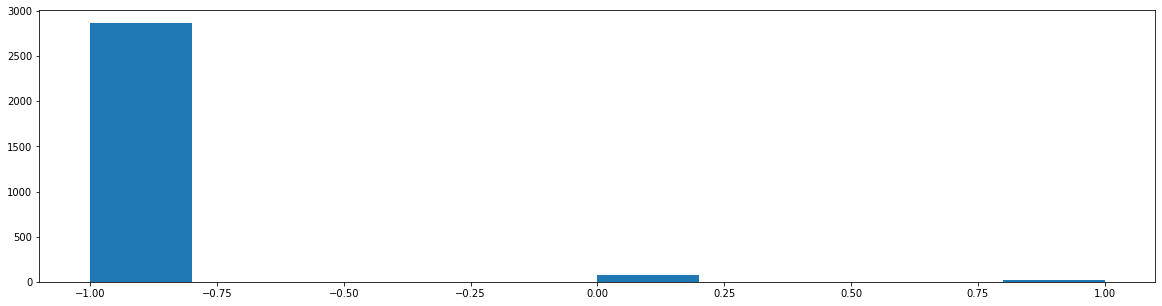

In [ ]:
opt_min_sample = 10
opt_eps = 0.5

clusterer = sklearn.cluster.DBSCAN(eps=opt_eps, min_samples=opt_min_sample, metric='cosine')
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

Purity: 0.2344804318488529


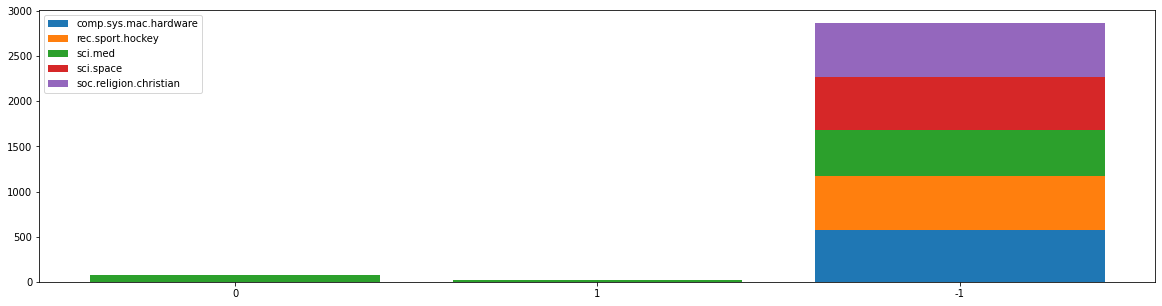

In [ ]:

cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

In [ ]:
opt_eps, opt_min_sample

(0.5, 10)

Purity: 0.2344804318488529


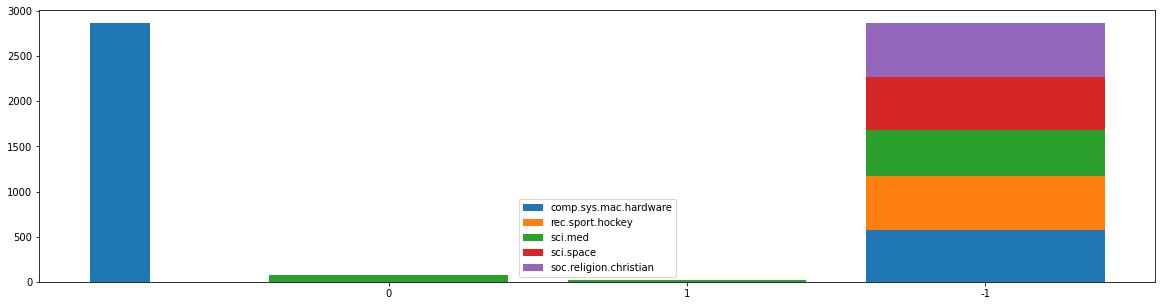

In [ ]:
clusterer = sklearn.cluster.DBSCAN(eps=opt_eps, min_samples=opt_min_sample, metric='cosine')
clusts = clusterer.fit_predict(train.vecs)
plt.hist(clusts)

cluster_purity(clusts, train.target)
print('Purity:', purity_score(clusts, train.target))

# Agglomerative Clustering

In [ ]:
num_points = 500
data = train.data[:num_points]
target= train.target[:num_points]
features = TfidfVectorizer(ngram_range=(1,2), stop_words= 'english', lowercase=True, max_features=300)
vecs = features.fit_transform(data)
clusterer = sklearn.cluster.AgglomerativeClustering(affinity='euclidean', linkage="ward")
clusts = np.array(clusterer.fit_predict(vecs.toarray()))

In [ ]:
def clustering_from_tree(clusterer, i):
  n_samples = clusterer.n_leaves_
  nodes = clusterer.children_
  pclusts = np.arange(n_samples)
  def label_clust(nid, label):
    if nid < n_samples:
      pclusts[nid] = label
    else:
      lchild = nodes[nid-n_samples][0]
      label_clust(lchild, label)
      rchild = nodes[nid-n_samples][1]
      label_clust(rchild, label)

  #simulate the clustering
  for j in range(i):
    lchild = nodes[j][0]
    label_clust(lchild, n_samples+j)
    rchild = nodes[j][1]
    label_clust(rchild, n_samples+j)
  return pclusts



Number of clusters 30


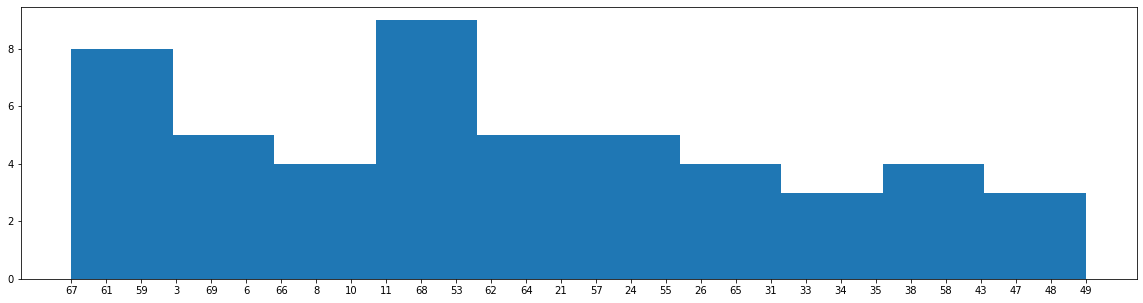

In [ ]:
clusts = clustering_from_tree(clusterer, 20)
plt.hist([str(c) for c in clusts])
print("Number of clusters", len(list(set(clusts))))

Purity: 0.82


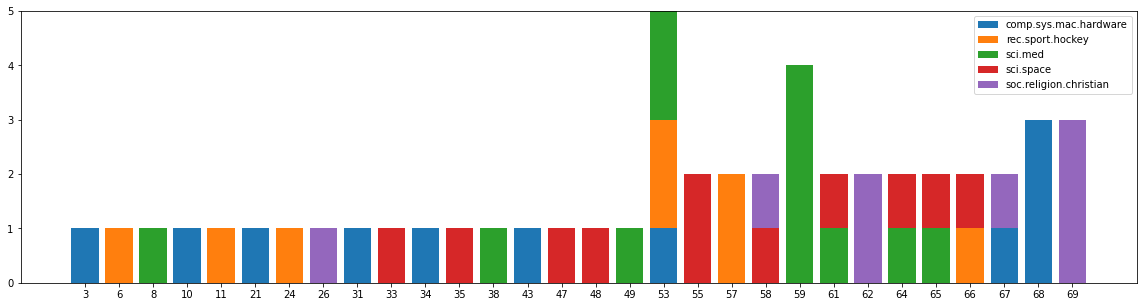

In [ ]:
cluster_purity(clusts, target)
print('Purity:', purity_score(clusts, target))

In [ ]:
clusts = clustering_from_tree(clusterer, 480)
plt.hist([str(c) for c in clusts])
print("Number of clusters", len(list(set(clusts))))

In [ ]:
cluster_purity(clusts, target)
print('Purity:', purity_score(clusts, target))

Text(0, 0.5, 'Purity')

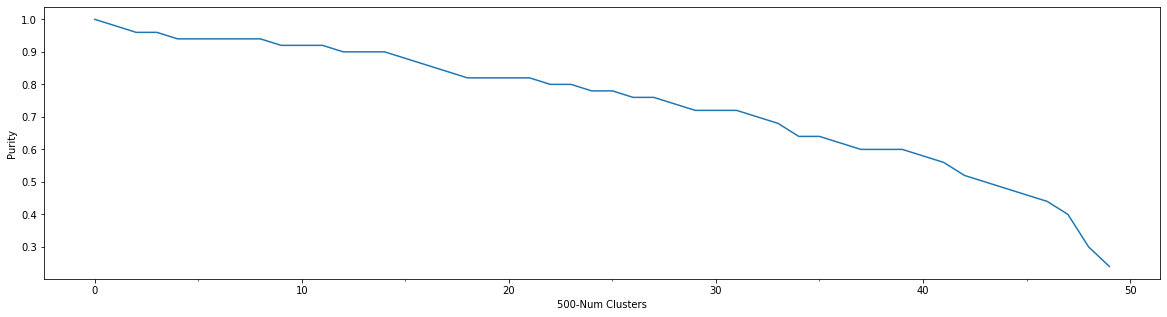

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

numcs = []
purities = []
for i in range(num_points):
  clusts = clustering_from_tree(clusterer, i)
  numc = len(list(set(clusts)))
  numcs.append(numc)
  purities.append(purity_score(clusts, target))
    
fig, ax = plt.subplots()
ax.plot(range(num_points), purities)

# For the minor ticks, use no labels; default NullFormatter.
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.set_xlabel('500-Num Clusters')
ax.set_ylabel('Purity')

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
print(clusterer.fit_predict(vecs.toarray()))

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


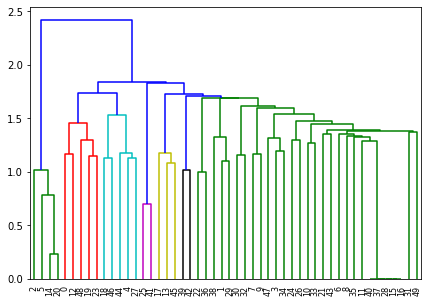

In [ ]:
plt.figure(figsize=(7,5))
dend = sch.dendrogram(sch.linkage(vecs.toarray(), method='ward'))
plt.show()